# Рубежный контроль 2
## Целуйко Ульяна ИУ5-61Б Вариант 20

Для заданного набора данных impeachment-polls.csv постройте модели классификации. 
Для построения моделей используйте методы логистическая регрессия	и случайный лес

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:

# Загрузка датасета
df = pd.read_csv('impeachment-polls.csv')

# Проверка пропусков до обработки
print("Количество пропусков в каждом столбце до обработки:")
print(df.isnull().sum())


Количество пропусков в каждом столбце до обработки:
Start           0
End             0
Pollster        0
Sponsor       266
SampleSize      0
Pop             0
tracking      428
Text            1
Category        1
Include?        0
Yes             0
No              0
Unsure         21
Rep Sample     67
Rep Yes        33
Rep No         50
Dem Sample     65
Dem Yes        27
Dem No         51
Ind Sample    133
Ind Yes        95
Ind No        112
URL             1
Notes         535
dtype: int64


In [20]:
# Удалить ненужные столбцы
columns_to_drop = ['Start', 'End', 'Pollster', 'Sponsor', 'Pop', 'tracking', 'Text', 'URL', 'Notes']
df.drop(columns=columns_to_drop, inplace=True)

# Заполнение пропусков средними значениями по партиям
df['Rep Sample'] = df['Rep Sample'].fillna(df['Rep Sample'].mean())
df['Rep Yes'] = df['Rep Yes'].fillna(df['Rep Yes'].mean())
df['Rep No'] = df['Rep No'].fillna(df['Rep No'].mean())

df['Dem Sample'] = df['Dem Sample'].fillna(df['Dem Sample'].mean())
df['Dem Yes'] = df['Dem Yes'].fillna(df['Dem Yes'].mean())
df['Dem No'] = df['Dem No'].fillna(df['Dem No'].mean())

df['Ind Sample'] = df['Ind Sample'].fillna(df['Ind Sample'].mean())
df['Ind Yes'] = df['Ind Yes'].fillna(df['Ind Yes'].mean())
df['Ind No'] = df['Ind No'].fillna(df['Ind No'].mean())

# Заполнение оставшихся пропусков медианными значениями
df['Unsure'] = df['Unsure'].fillna(df['Unsure'].median())

# Проверка пропусков после заполнения
print("\nКоличество пропусков в каждом столбце после заполнения:")
print(df.isnull().sum())


Количество пропусков в каждом столбце после заполнения:
SampleSize    0
Category      1
Include?      0
Yes           0
No            0
Unsure        0
Rep Sample    0
Rep Yes       0
Rep No        0
Dem Sample    0
Dem Yes       0
Dem No        0
Ind Sample    0
Ind Yes       0
Ind No        0
dtype: int64


In [21]:
# Кодирование целевой переменной
target_mapping = {'yes': 1, 'no': 0}
df['Include?'] = df['Include?'].map(target_mapping)

In [22]:
# Выделение признаков для масштабирования
features = ['SampleSize', 'Yes', 'No', 'Unsure', 'Rep Sample', 'Rep Yes', 'Rep No', 'Dem Sample', 'Dem Yes', 'Dem No', 'Ind Sample', 'Ind Yes', 'Ind No']

X = df[features]
y = df['Include?']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Проверка на наличие NaN после масштабирования
print("\nКоличество пропусков в X_scaled:")
print(np.isnan(X_scaled).sum())



Количество пропусков в X_scaled:
0


In [23]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
# Обучение и оценка логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("\nЛогистическая регрессия")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Логистическая регрессия
Accuracy: 0.9541284403669725
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.96      0.99      0.98       104

    accuracy                           0.95       109
   macro avg       0.73      0.60      0.63       109
weighted avg       0.94      0.95      0.94       109



In [25]:
# Обучение и оценка модели случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nСлучайный лес")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#


Случайный лес
Accuracy: 0.963302752293578
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.96      1.00      0.98       104

    accuracy                           0.96       109
   macro avg       0.98      0.60      0.66       109
weighted avg       0.96      0.96      0.95       109



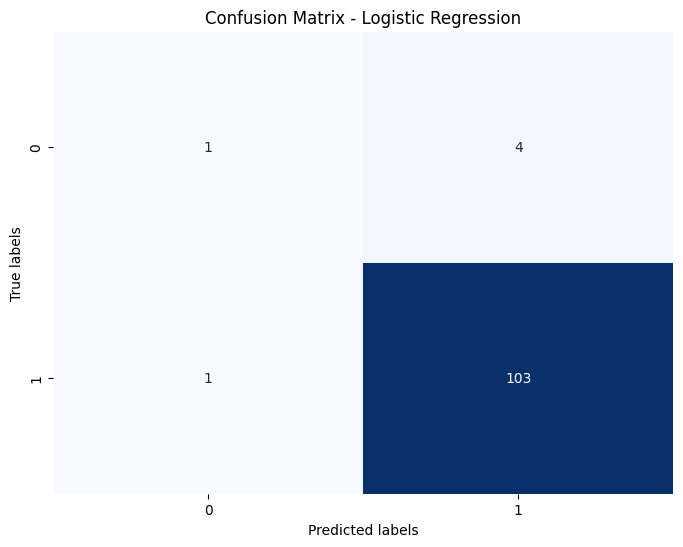

In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# Confusion Matrix для логистической регрессии
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

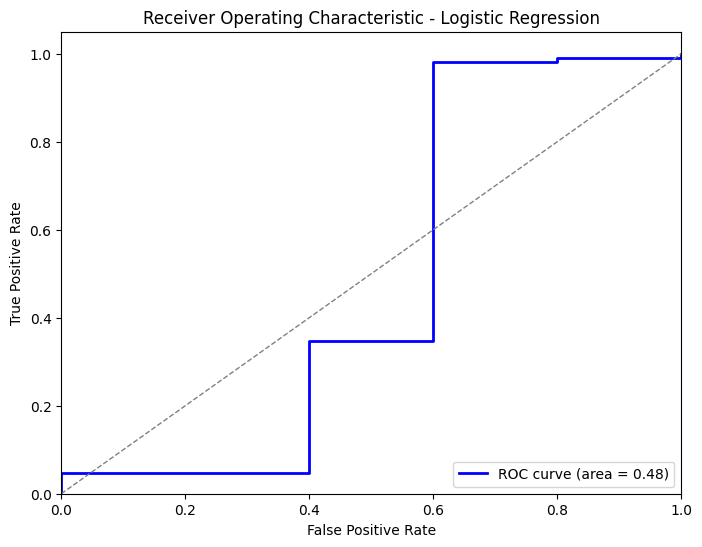

In [27]:
# ROC Curve и AUC-ROC для логистической регрессии
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

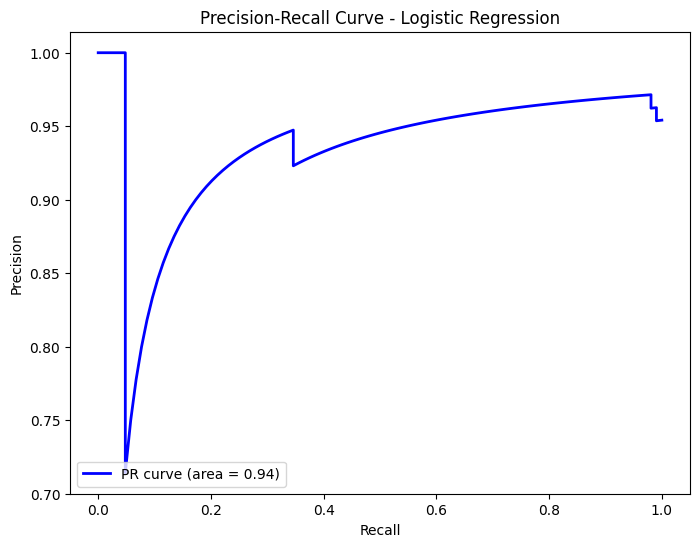

In [28]:
# PR Curve и AUC-PR для логистической регрессии
precision_log_reg, recall_log_reg, thresholds_pr_log_reg = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:,1])
pr_auc_log_reg = auc(recall_log_reg, precision_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(recall_log_reg, precision_log_reg, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc_log_reg)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.show()

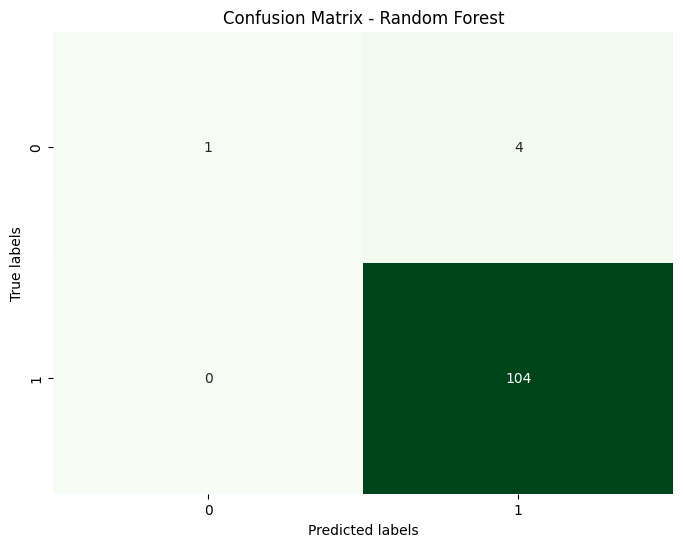

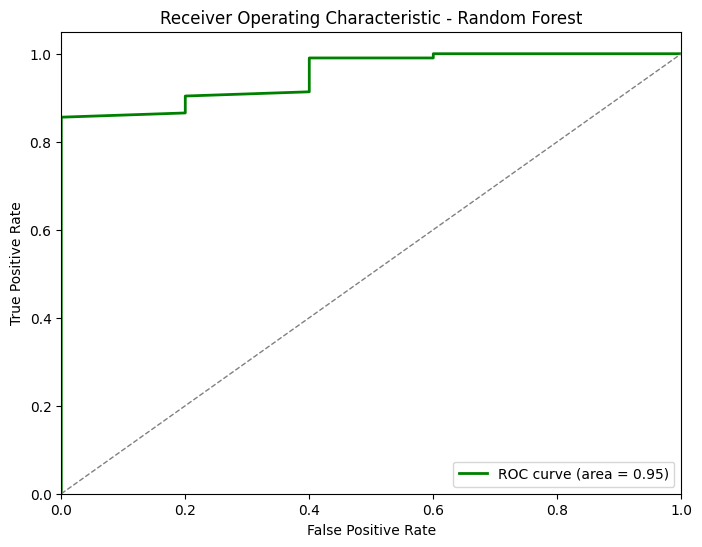

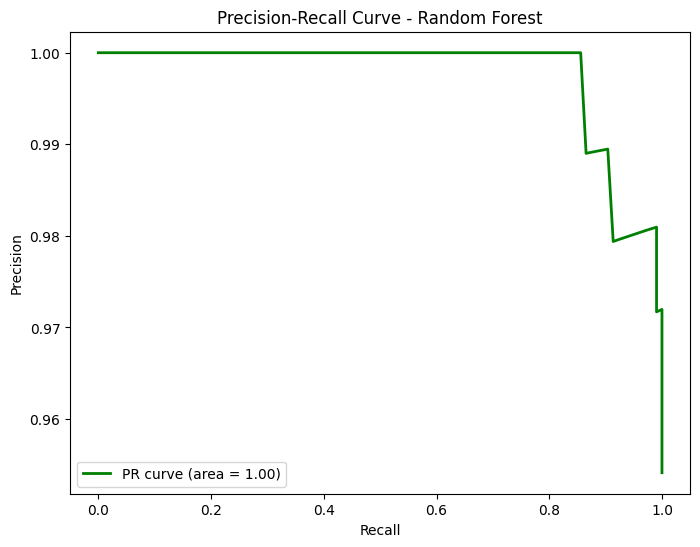

In [29]:
# Confusion Matrix для случайного леса
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve и AUC-ROC для случайного леса
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

# PR Curve и AUC-PR для случайного леса
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')
plt.show()


В коде используются следующие метрики для оценки производительности моделей:

1. **Accuracy (Точность)**: Это общее количество правильно классифицированных экземпляров, поделенное на общее количество экземпляров.

2. **Precision (Точность)**: Это отношение количества истинно положительных результатов к общему количеству положительных результатов, предсказанных моделью. 

3. **Recall (Полнота)**: Это отношение количества истинно положительных результатов к общему количеству действительных положительных результатов в данных.

4. **ROC Curve и AUC-ROC**: Кривая ROC (Receiver Operating Characteristic) показывает отношение между долей истинно положительных результатов и долей ложно положительных результатов при различных порогах классификации. Площадь под кривой ROC (AUC-ROC) представляет собой общую производительность модели, где AUC = 1 означает идеальную модель, а AUC = 0,5 означает случайное угадывание.

5. **PR Curve и AUC-PR**: Кривая PR (Precision-Recall) показывает отношение между точностью и полнотой при различных порогах классификации. Площадь под кривой PR (AUC-PR) также измеряет общую производительность модели, преимущественно при несбалансированных классах.

Все эти метрики помогают оценить производительность моделей классификации на основе их способности правильно классифицировать данные.